# Appendix Machine Learning Summative Assessment

This notebook contains figures, implementations and results described in the main report. The notebook is commented, but every information is also covered in the report.

__Groundwork:__ <br>
Load packages and the *MNIST data set*

In [1]:
# Load packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
# Load Data
#!pip install python-mnist
from sklearn.datasets import fetch_mldata
from shutil import copyfileobj
from six.moves import urllib
from sklearn.datasets.base import get_data_home
import os

# define this function to read in MNIST data (also later on Azur)
def fetch_mnist(data_home=None):
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    data_home = get_data_home(data_home=data_home)
    data_home = os.path.join(data_home, 'mldata')
    if not os.path.exists(data_home):
        os.makedirs(data_home)
    mnist_save_path = os.path.join(data_home, "mnist-original.mat")
    if not os.path.exists(mnist_save_path):
        mnist_url = urllib.request.urlopen(mnist_alternative_url)
        with open(mnist_save_path, "wb") as matlab_file:
            copyfileobj(mnist_url, matlab_file)

fetch_mnist()
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")


X = mnist.data
X_df = pd.DataFrame(X)
Y = mnist.target

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


<br> Standardise the features in X

In [3]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_df_std = pd.DataFrame(X_std)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 1. Unsupervised learning.

Calculate PCA for all 784 features

In [4]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_std)

<br> Plotting *number of principle component* against *explained variance*: <br>

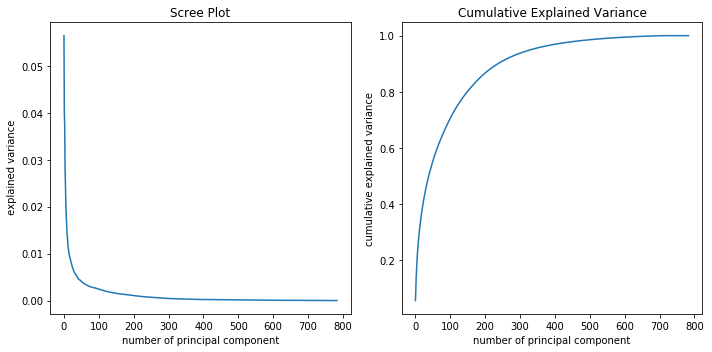

In [5]:
# Plot Scree Plot
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('number of principal component')
plt.ylabel(' explained variance')

# Plot Cumulative Explained Variance
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance')
plt.xlabel('number of principal component')
plt.ylabel('cumulative explained variance')
plt.tight_layout()
#plt.savefig('pca_explained_variance_ratio.png')
plt.show()

<br> Sometimes, in real life application, the analyst either knows how many components he/she needs or how much percantage of the variance he/she wants to explain.
- Desire to explain 95% of the variance in the data 


In [6]:
pca95 = PCA(0.95)
principalComponents95 = pca95.fit_transform(X_std)
print("To explain 95 percent of the variance in the data, %s principle component wouldbe required." % (pca95.n_components_))

To explain 95 percent of the variance in the data, 332 principle component wouldbe required.


- Desire to explain 80% of the variance in the data  

In [7]:
pca80 = PCA(0.80)
principalComponents80 = pca80.fit_transform(X_std)
print("To explain 80 percent of the variance in the data, %s principle component wouldbe required." % (pca80.n_components_))

To explain 80 percent of the variance in the data, 150 principle component wouldbe required.


<br> The total variance of the data are the same using the original feature representation or the PCs

In [8]:
total_variance = round(sum(X_df_std.var(axis = 0)),0)
print("Variance of data in orignal feature",total_variance)
print("Variance of data in PCs",round(sum(principalComponents.var(axis = 0)),0))

Variance of data in orignal feature 719.0
Variance of data in PCs 719.0


<br> The highest fraction of explained variance among the variables in the original representation is about 0.14%.

In [9]:
X_df_std.var(axis = 0).sort_values(ascending=False)[0:5]/total_variance

643    0.001391
15     0.001391
502    0.001391
169    0.001391
113    0.001391
dtype: float64

After applying PCA the highest fraction of explained variance among the PCs increases to 5.6%.

In [10]:
pca.explained_variance_ratio_[0:5]

array([0.05642719, 0.04041226, 0.03738273, 0.02893   , 0.02520752])

- Visual overview of how much each of the first component add to the explained variance

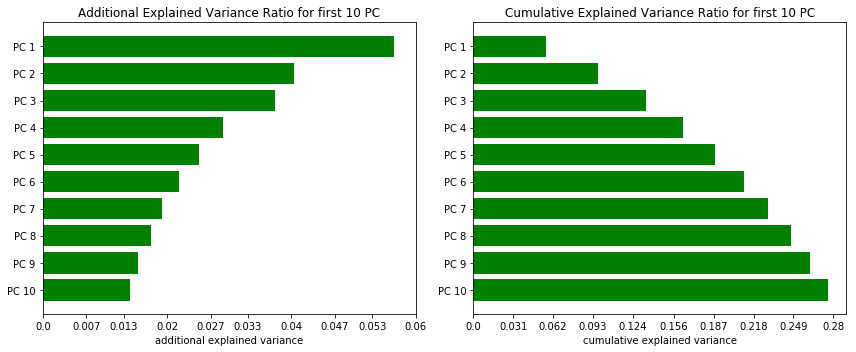

In [8]:
import math
added_variance = pca.explained_variance_ratio_[0:10]
cum_variance = np.cumsum(pca.explained_variance_ratio_[0:10])
y_pos = range(0,len(added_variance))
y_names = ["PC " + str(x) for x in range(1,len(added_variance)+1)]

fig = plt.figure(figsize = (12,5))
ax1 = plt.subplot(1,2,1)
ax1.barh(y_pos, added_variance, align='center', color='green', ecolor='black')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(y_names)
ax1.set_xticks((np.round(np.linspace(0,np.round(added_variance[0],2), 10),3)))
ax1.set_xticklabels(np.round(np.linspace(0,np.round(added_variance[0],2), 10),3))
ax1.invert_yaxis()
ax1.set_xlabel('additional explained variance')
ax1.set_title('Additional Explained Variance Ratio for first 10 PC')

ax2 = plt.subplot(1,2,2)
ax2.barh(y_pos, cum_variance, align='center', color='green', ecolor='black')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(y_names)
ax2.set_xticks((np.round(np.linspace(0,np.round(cum_variance[-1],2), 10),3)))
ax2.set_xticklabels(np.round(np.linspace(0,np.round(cum_variance[-1],2), 10),3))
ax2.invert_yaxis()
ax2.set_xlabel('cumulative explained variance')
ax2.set_title('Cumulative Explained Variance Ratio for first 10 PC')
#plt.savefig('pca_explained_variance_ratio_10pc.png')
fig.tight_layout()


In [9]:
print("Taking the first two principle component would explain about %s of the data" % (round(np.sum(pca.explained_variance_ratio_[0:2]),2)))
print("Taking the first three principle component would explain about %s of the data" % (round(np.sum(pca.explained_variance_ratio_[0:3]),2)))
print("Taking the 50 principle component would explain about %s of the data" % (round(np.sum(pca.explained_variance_ratio_[0:50]),2)))

Taking the first two principle component would explain about 0.1 of the data
Taking the first three principle component would explain about 0.13 of the data
Taking the 50 principle component would explain about 0.55 of the data


<br> Reducing the data to three principle components and add the target column for further visualisations

In [23]:
pca3 = PCA(n_components=3)
principalComponents3= pca3.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents3)
pca_Df = pd.concat([principalDf, Y], axis = 1)
pca_Df.columns = ['PC 1', 'PC 2', 'PC 3','Target']
pca_Df.head(3)

,PC 1,PC 2,PC 3,Target
0,8.813533,-7.517663,-3.714736,0.0
1,10.500251,-8.016778,-4.165984,0.0
2,1.910356,-6.306650,-1.715844,0.0


<br> Start with a 2-Dimensional plot first, taking only the first two principle components into account: <br>
As visual in the plot, the first two components only explain a small variance in the data (10 percent, see above), as the data points of each digit-class are not clearly seperated
<br> Than visualise 3-Dimensional plot, taking the first three principle components into account: <br>
Adding a third principle component does not seperate the digits-class better than two principle components (from visual inspection). 
Only 3 percent of the datas variance is additionally explained by the third principle component (total 13 percent, see above).

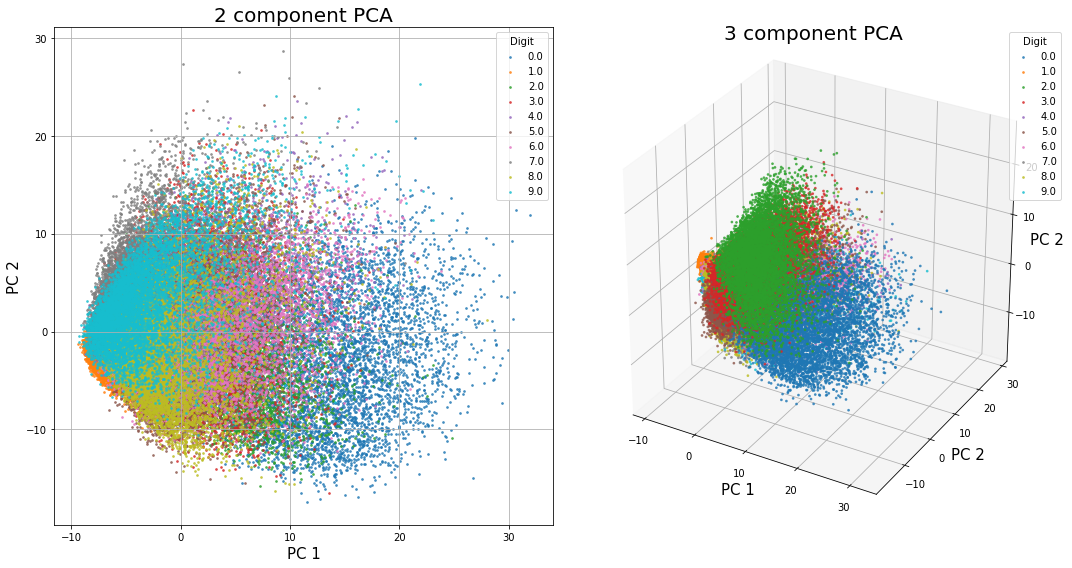

In [29]:
fig = plt.figure(figsize = (15,8))


# 2-D Scatter Plot
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('PC 1', fontsize = 15)
ax1.set_ylabel('PC 2', fontsize = 15)
ax1.set_title('2 component PCA', fontsize = 20)
targets = list(set(pca_Df['Target']))
colors = list('bgrcmkydfh')
# in order to get a legend with all 10 digits loop
for target, color in zip(targets, colors):
    indicesToKeep = pca_Df['Target'] == target
    ax1.scatter(pca_Df.loc[indicesToKeep, 'PC 1']
               , pca_Df.loc[indicesToKeep, 'PC 2']
               , s = 3
               , alpha=0.7
               , cmap="Set2_r")
ax1.legend(targets,title="Digit")
ax1.grid()

# 3-D Scatter plot
from mpl_toolkits.mplot3d import axes3d
ax2 = fig.add_subplot(1,2,2, projection='3d') 
ax2.set_xlabel('PC 1', fontsize = 15)
ax2.set_ylabel('PC 2', fontsize = 15)
ax2.set_zlabel('PC 2', fontsize = 15)
ax2.set_title('3 component PCA \n', fontsize = 20)

# in order to get a legend with all 10 digits loop
for target, color in zip(targets, colors):
    indicesToKeep = pca_Df['Target'] == target
    ax2.scatter(pca_Df.loc[indicesToKeep, 'PC 1']
               , pca_Df.loc[indicesToKeep, 'PC 2']
               , pca_Df.loc[indicesToKeep, 'PC 3']
               , s = 3
               , alpha = 0.7
               , cmap="Set2_r")
ax2.legend(targets,title="Digit")
ax2.grid()
fig.tight_layout()
plt.savefig('pca_scatter.png')

## 2. Support vector machines.

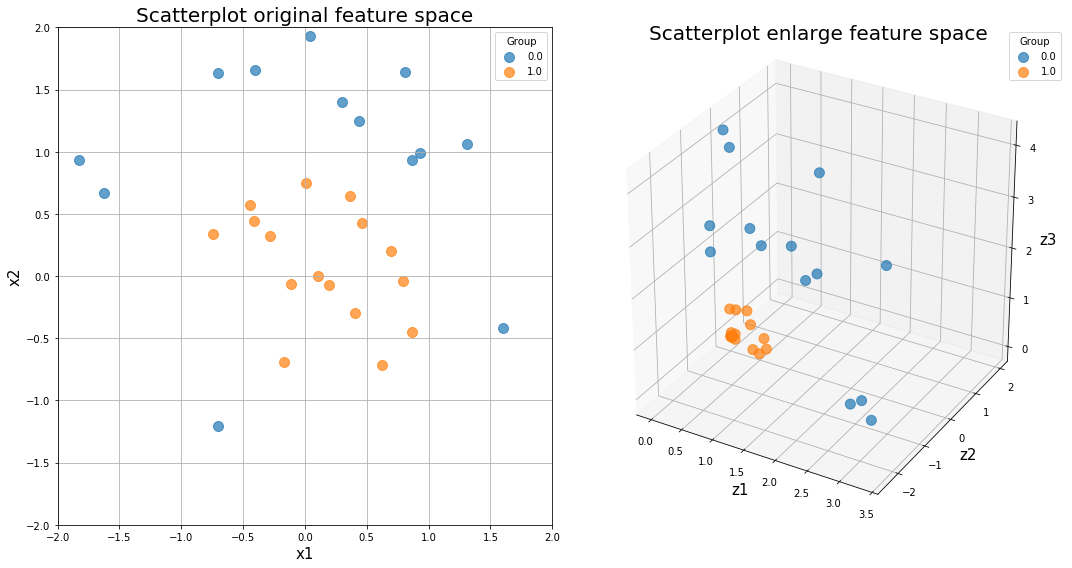

In [293]:
np.random.seed(117)
#np.random.seed(175)
# Data in original feature space
x1 = np.random.normal(0,1,30)
x2 = np.random.normal(0,1,30)
y = ((x1**2+x2**2)<1)*1
df = pd.DataFrame([x1,x2,y]).T
df.columns = ["x1","x2","y"]

# Mapping orginal data in higher dim space
z1 = x1**2
z2 = np.sqrt(2)*x1*x2
z3 = x2**2
df3D = pd.DataFrame([z1,z2,z3,y]).T
df3D.columns = ["z1","z2","z3","y"]

# Plotting
fig = plt.figure(figsize = (15,8))
ax1 = plt.subplot(1,2,1)
#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 
axes1 = plt.gca()
axes1.set_ylim([-2,2])
axes1.set_xlim([-2,2])
ax1.set_xlabel('x1', fontsize = 15)
ax1.set_ylabel('x2', fontsize = 15)
ax1.set_title('Scatterplot original feature space', fontsize = 20)
targets = list(set(df['y']))
colors = list('bgrcmkydfh')
# in order to get a legend with all 9 digits lopp
for target, color in zip(targets, colors):
    indicesToKeep = df['y'] == target
    ax1.scatter(df.loc[indicesToKeep, 'x1']
               , df.loc[indicesToKeep, 'x2']
               , s = 100
               , alpha=0.7
               , cmap="Set2_r")
ax1.legend(targets,title="Group")
ax1.grid()

from mpl_toolkits.mplot3d import axes3d
ax2 = fig.add_subplot(1,2,2, projection='3d') 
ax2.set_xlabel('z1', fontsize = 15)
ax2.set_ylabel('z2', fontsize = 15)
ax2.set_zlabel('z3', fontsize = 15)
ax2.set_title('Scatterplot enlarge feature space\n', fontsize = 20)

# in order to get a legend with all 9 digits lopp
for target, color in zip(targets, colors):
    indicesToKeep = df3D['y'] == target
    ax2.scatter(df3D.loc[indicesToKeep, 'z1']
               , df3D.loc[indicesToKeep, 'z2']
               , df3D.loc[indicesToKeep, 'z3']
               , s = 100
               , alpha = 0.7
               , cmap="Set2_r")
ax2.legend(targets,title="Group")
ax2.grid()
fig.tight_layout()
plt.savefig('kernel_scatter.png')
#plt.savefig('pcs_3dim_scatter.png')
#plt.savefig('pcs_2dim_scatter.png')

Import packages needed for calculating *SVM*

In [9]:
from sklearn.svm import SVC
from sklearn import metrics
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
#import datetime
from time import time
import pickle

<br> Split data randomly into training data (80%) and testing data (20%) using the standardise X data (needed for SVM and NN training)

In [12]:
# shuffle data and split train and test data
np.random.seed(123)
mask = np.random.rand(len(Y)) < 0.8
Xtrain = X_df_std.iloc[mask]
Ytrain = Y[mask]

Xtest = X_df_std.iloc[~mask]
Ytest = Y[~mask]

<br> *Utility function* to report best scores (per default, best three scores)

In [33]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        # return index
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score (accuracy): {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

<br> First build a SVM *linear classifier*, which can later be compared to a *non-linear classifier*
<br> To find an optimal SVM with linear kernel, SVM is tuned with a range of values for the cost parameter. 

Apply random search with search size 20 to keep the computational time low. 
<br> The actual random search for SVM with linear kernel is carried out on the OII server, the results are save in 'linear_clf_rss' and is read in for further analysis.
<br> Randomized Search with 10-CV took 22125.08 seconds (6.15h) for 20 candidates parameter settings on the OII server.
<br> For a linear kernel the optimal cost value (given a search space 2^(-3) to 2^3) is 0.125 which yields a test accuracy score of 0.969.

In [ ]:
# Build a linear SVM classifier
linear_clf = SVC(kernel='linear')

# specify parameter space for costs
param_dist = {"C": np.linspace(2**-3, 2**3, 20)}

#n_jobs=-1 ( using all processors, parallel computing) to speed up computation
n_iter_search = 20
linear_clf_rs = RandomizedSearchCV(linear_clf, 
                                   param_distributions=param_dist,
                                   n_iter = n_iter_search, 
                                   cv=10,
                                   n_jobs=-1)


# !! This part is run on the OII server, the results are saved in pickle_linear_clf_rs.pkl and read in here for further analysis.
# start = time()
# linear_clf_rs.fit(Xtrain, Ytrain)
# print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time() - start), n_iter_search))

# Save to file in the current working directory
# pkl_filename = "pickle_linear_clf_rs.pkl"  
# with open(pkl_filename, 'wb') as file:  
#     pickle.dump(linear_clf_rs, file)

In [158]:
# Load from file
pkl_filename = "pickle_linear_clf_rs.pkl"  
with open(pkl_filename, 'rb') as file:  
    pickle_linear_clf_rs = pickle.load(file)

report(pickle_linear_clf_rs.cv_results_)

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVC from version 0.20.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Model with rank: 1
Mean validation score (accuracy): 0.931 (std: 0.005)
Parameters: {'C': 0.125}

Model with rank: 2
Mean validation score (accuracy): 0.924 (std: 0.005)
Parameters: {'C': 0.5394736842105263}

Model with rank: 3
Mean validation score (accuracy): 0.922 (std: 0.005)
Parameters: {'C': 0.9539473684210527}



/anaconda3/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 0.20.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<br> Build additionally an SVM with polynomial kernel.
<br> As an additional parameter is tuned, the number of searches is increased to 40 (arbitrarily).
<br> The actual random search for SVM with linear kernel is carried out on the OII server, the results are save in 'poly_clf_rss' and is read in for further analysis.
<br> Randomized Search with 10-CV took 54554.68 seconds (15.15h) for 40 candidates parameter settings on the OII server.
<br> For a Polynomial kernel there are several optimal parameter set. An example: The optimal degree (given a search space 2 to 5) is 3, cost value (given a search space 2^(-3) to 2^3) is 0.54 and for gamma (given a search space 0.4 to 4) is 1.34 a, which yields a test score of 0.996.

In [9]:
# Build a Polynomial SVM classifier
poly_clf = SVC(kernel='poly')

# specify parameters and distributions to sample from
param_dist = {"C": np.linspace(2**-3, 2**3, 20),
              "gamma": np.linspace(0.4, 4, 20),
              "degree": [2,3,4,5]
             }

n_iter_search = 40
poly_clf_rs = RandomizedSearchCV(poly_clf, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search, 
                                   cv=10,
                                   n_jobs=-1)
# !! This part is run on the OII server, the results are saved in pickle_poly_clf_rs.pkl and read in here for further analysis.
# start = time()
# poly_clf_rs.fit(Xtrain, Ytrain)
# print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time() - start), n_iter_search))

# Save to file in the current working directory
# pkl_filename = "pickle_poly_clf_rs.pkl"  
# with open(pkl_filename, 'wb') as file:  
#    pickle.dump(poly_clf_rs, file)

In [151]:
# Load from file
pkl_filename = "pickle_poly_clf_rs.pkl"
with open(pkl_filename, 'rb') as file:  
    pickle_poly_clf_rs = pickle.load(file) 

report(pickle_poly_clf_rs.cv_results_)

Model with rank: 1
Mean validation score (accuracy): 0.977 (std: 0.002)
Parameters: {'gamma': 1.3473684210526318, 'degree': 3, 'C': 3.855263157894737}

Model with rank: 1
Mean validation score (accuracy): 0.977 (std: 0.002)
Parameters: {'gamma': 3.8105263157894735, 'degree': 3, 'C': 2.197368421052632}

Model with rank: 1
Mean validation score (accuracy): 0.977 (std: 0.002)
Parameters: {'gamma': 1.9157894736842107, 'degree': 3, 'C': 7.585526315789474}

Model with rank: 1
Mean validation score (accuracy): 0.977 (std: 0.002)
Parameters: {'gamma': 1.3473684210526318, 'degree': 3, 'C': 0.5394736842105263}

Model with rank: 1
Mean validation score (accuracy): 0.977 (std: 0.002)
Parameters: {'gamma': 1.1578947368421053, 'degree': 3, 'C': 6.342105263157895}

Model with rank: 1
Mean validation score (accuracy): 0.977 (std: 0.002)
Parameters: {'gamma': 2.294736842105263, 'degree': 3, 'C': 1.7828947368421053}

Model with rank: 1
Mean validation score (accuracy): 0.977 (std: 0.002)
Parameters: {'g

<br> Now extract the best model of each kernel type and apply them on the test data (which is never seen by the model before). 

In [160]:
# Now apply best model on tests data
y_true1, y_pred1 = Ytest,  pickle_linear_clf_rs.predict(Xtest)
print("Model accuracy on test data for linear kernel", accuracy_score(y_true1, y_pred1))

y_true2, y_pred2 = Ytest, rbf_clf_rs.predict(Xtest)
print("Model accuracy on test data for radial basis kernel", accuracy_score(y_true2, y_pred2))

y_true3, y_pred3 = Ytest, pickle_poly_clf_rs.predict(Xtest)
print("Model accuracy on test data for polynomial kernel", accuracy_score(y_true3, y_pred3))

Model accuracy on test data for linear kernel 0.9691966838193253
Model accuracy on test data for polynomial kernel 0.9955688965122927


## 3b. Neural Networks.

In [22]:
# Input dimensions
# n_hidden_units: number of hidden units (scalar)
# x: feature set with dim (n_featuresx number of observations) (array)
# y: response variable with dim (n_output x number of observations) (array)

class NN_sgd_multiclass:
    import numpy as np
    def __init__(self, n_hidden_units, x, y, seed):
        """
        Define a class for training a NN for muli-class classification using stochastic gradient descent and backpropagation.

        Args:
        ----------
        n_hidden units: int
            The number of hidden units in the hidden layer
        x: numpy.ndarray
             Training (feature) set with rows are the features and columns the observations 
        y : numpy.ndarray
             Response variable of training set with rows are class of the output and columns the observations

        Attributes
        ---------
        X (numpy.ndarray): training data features
        Y (numpy.ndarry): training data responses
        n_features (int): number of features
        n_observations (int): number of observations
        n_hidden_units (int): number of hidden units
        n_output (int): number of classes in the output layer
        W1 (numpy.ndarray): Matrix of weights for layer 1, dimension (n_features x n_hidden_units)
        B1 (numpy.ndarray): Matrix of biases for layer 1, dimension (n_features x 1)
        W2 (numpy.ndarray): Matrix of weights for layer 2, dimension (n_hidden_units x n_output)
        B2 (numpy.ndarray): Matrix of biases for layer 2, (dimension n_features x 1)
        """
        
        # Check input type
        if not isinstance(x, (np.ndarray)):
            raise TypeError('X should be an array')
        if not isinstance(y, (np.ndarray)):
            raise TypeError('Y should be an array')
            
            
        # Shuffle data for training
        perm = np.random.RandomState(seed=seed).permutation(x.shape[1])
        self.X = x[:,perm]
        self.Y = y[:,perm]
        self.n_features = self.X.shape[0]
        self.n_observations = self.X.shape[1]
        self.n_hidden_units = n_hidden_units
        self.n_output = self.Y.shape[0]
        
        # Print output for the user to check if input dimension is true
        print("The dimensions of your inputs are:")
        print("Number of observations:",self.n_observations)
        print("Number of features in input layer:",self.n_features)
        print("Number of neurons in hidden layer:",self.n_hidden_units)
        print("Number of classes:",self.n_output)
    
        
        #  Dim n_features x n_hidden_units
        self.W1 = np.random.randn(self.n_features, self.n_hidden_units)
        
        # Dim n_hidden_units x 1
        self.B1 = np.zeros((self.n_hidden_units, 1))
        
        # Dim n_hidden_units x n_output
        self.W2 = np.random.randn(self.n_hidden_units, self.n_output)  
        
        # Dim n_output x 1
        self.B2 = np.zeros((self.n_output, 1))
        
    def sigmoid(self, arg):
        """
        Calculate the sigmoid function
        """
        s = 1 / (1 + np.exp(-arg))
        return s

    def sigmoid_derivative(self, arg):
        """
        Calculate the derivative of the sigmoid function
        """
        ds = self.sigmoid(arg) * (1-self.sigmoid(arg))
        return ds
    
    def cross_entropy(self,ytrue): 
        """
        Calculate the Cross Entropy for one example.
        """
        L = -np.sum(np.dot(ytrue.T,np.log(self.Yhat)))
        
        # Without SGD add these two lines
        #m = ytrue.shape[1]
        #L = (1/m) * L_sum
        return L
    
    def softmax(self, y):
        """
        Calculate the Softmax function
        """
        exps = np.exp(y)
        g = exps/np.sum(exps, axis=0)
        return g

    
    
    def feedforward(self, x_ff_input):
        """
        Calculate the feedforward step according to the report.
        """
        
        # Calculate hidden layer
        T1 = np.dot(self.W1.T, x_ff_input) + self.B1
        Z1 = self.sigmoid(T1)

        
        # Calculate Yhat (output layer) 
        T2 = np.dot(self.W2.T, Z1) + self.B2
        Yhat = self.softmax(T2)
        
        # Save layers and nodes values in a dictionary and return for later use
        ff_dict = {'T1':T1, 'Z1':Z1, 'T2':T2, 'Yhat':Yhat}
        return ff_dict
         
    def backpropagation(self, x_input, y_input):
        """
        Calculate the feedforward step according to the report.
        """
        
        # Calculate Cross Entropy loss
        ff = self.feedforward(x_input)
        self.Yhat = ff['Yhat']
        loss = self.cross_entropy(y_input)
        
        # Derivative of Cross Entropy combined with softmax
        delta_L = ff['Yhat'] - y_input
        
        # Derivative of Loss over Weights 2
        dL_dW2 = np.dot(ff['Z1'], delta_L.T)
       
        # Derivative of Loss over Bias 2
        dL_dB2 = delta_L.T * 1
        
        # Derivative of Loss over Weights 1
        dL_dW1 =  np.dot(x_input, self.sigmoid_derivative(ff['T1']).T * np.dot(delta_L.T, self.W2.T))
        
        # Derivative of Loss over Bias 2
        dL_dB1 =  self.sigmoid_derivative(ff['T1']).T * np.dot(delta_L.T, self.W2.T)
       
        # update old weights with new corresponding derivatives
        self.W1 = self.W1 - self.learning_rate * dL_dW1
        self.B1 = self.B1 - self.learning_rate * dL_dB1.T
        self.W2 = self.W2 - self.learning_rate * dL_dW2
        self.B2 = self.B2 - self.learning_rate * dL_dB2.T
        return loss
        
    
    def fit(self, epochs = 1, learning_rate = 1):
        """
        Fit the initialised neural network, using backpropagation and SGD.
        
        Args
        ----------
        epochs: int
            Set the number of times, the NN sees the training data. (default 1)
        
        learning_rate: int
            Defines how much the weights are adjusted with respect the loss gradient after each backpropagation step (default 1)
        
        """
        
        self.learning_rate = learning_rate
        self.cost = []
        
        # Repeat passing the entire data set through the network
        for i in range(epochs):
            # One training observation at a time is passed, as SGD is used
            for j in range(0, self.n_observations):
                xinput1 = np.asarray([self.X[:,j]]).T
                yinput1 = np.asarray([self.Y[:,j]]).T
                cost = self.backpropagation(xinput1, yinput1)
                self.cost.append(cost)
            if(i%2 == 0):
                print("Epoch", i, "cost:", cost)

            
    def predict(self, xtest):
        """
        Predict new data based on the trained model
        
        Args
        ----------
        x: numpy.ndarray
             Test (feature) set with rows are the features and columns the observations 
        
        Returns
        ----------
        numpy.ndarray: Returns the propability for every class (row), indicating the likelihood of the membership to that class for each observation (column)
        numpy.ndarray: Returns the classified class for each observation
             
        """
        print("The dimensions of your test inputs are:")
        print("Number of observations:",xtest.shape[1])
        print("Number of features in input layer:",xtest.shape[0])
        
        pred_ff = self.feedforward(xtest)
        
        # predicted class is the highest probability
        predictions = np.argmax(pred_ff['Yhat'], axis=0)
        return pred_ff['Yhat'], predictions


<br> Preprocessing MNIST data for applying NN
<br> - Hot encode target variable y <br> (each training example is one column, rowvalue = 1 indicates the class memebership, else 0)
<br> - Standardise feature variable X
<br> - Transpose data, so that each column is one training example
<br> - Split data into training and test data

In [16]:
# split data and hot encode and standardise
np.random.seed(124)
mask = np.random.rand(len(Y)) < 0.8
Xtrain = X[mask]/255

Ytrain_k = Y[mask]
Ytrain_str = pd.DataFrame(Ytrain_k).astype("str")
Ytrain_dummy = pd.get_dummies(Ytrain_str)
Ytrain = np.asarray(Ytrain_dummy)


Xtest = X[~mask]/255
Ytest_k = Y[~mask]
Ytest_str = pd.DataFrame(Ytest_k).astype("str")
Ytest_dummy = pd.get_dummies(Ytest_str)
Ytest = np.asarray(Ytest_dummy)

<br> Apply the build Neuralnetwork with stochastic gradient descent and one hidden layer with 100 hidden units on the MNIST data

In [18]:
# Initalise Class 
np.random.seed(124)
n_hidden_units = 100
nn_class = NN_sgd_multiclass(n_hidden_units, Xtrain.T,  Ytrain.T, seed = 124)

The dimensions of your inputs are:
Number of observations: 56174
Number of features in input layer: 784
Number of neurons in hidden layer: 100
Number of classes: 10


In [378]:
# Fit with 5 epochs
nn_class.fit(epochs = 20, learning_rate = 0.1)

Epoch 0 cost: 3.947869572110296e-05
Epoch 2 cost: 4.203116647542384e-06
Epoch 4 cost: 1.0462471943581848e-08
Epoch 6 cost: 1.828273293928602e-08
Epoch 8 cost: 1.2779900330834232e-08
Epoch 10 cost: 1.4446888130341668e-11
Epoch 12 cost: 4.1804670837016845e-11
Epoch 14 cost: 1.9486301461503217e-11
Epoch 16 cost: 5.781307656499714e-10
Epoch 18 cost: 2.3074875343835874e-12


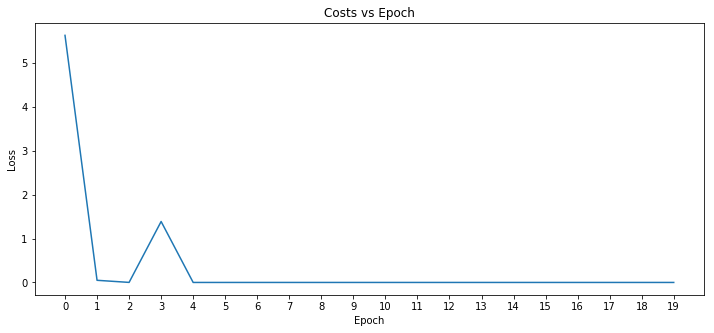

In [387]:
epoch_cost = df[df.index % Xtrain.T.shape[1] == 0]
plt.figure(figsize = (12,5))
plt.plot(range(0,len(epoch_cost)),epoch_cost )
plt.xlabel('Epoch')
plt.xticks(range(0,len(epoch_cost)))
plt.ylabel('Loss')
plt.title('Costs vs Epoch')
plt.savefig('cost_epoch.png')
plt.show()

In [380]:
#Predict 
NN_yhat1, NN_pred_lab1 = nn_class.predict(xtest = Xtest.T)

The dimensions of your test inputs are:
Number of observations: 13826
Number of features in input layer: 784


In [381]:
# Calculate Accuracy Score
true_class = np.argmax(Ytest.T, axis=0)
accuracy_score(NN_pred_lab1, true_class)

0.9659337480109937

In [417]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Print a Classification report, printing the most common scores for classification
print(classification_report(NN_pred_lab1, true_class))

# Print the confusion matrix to see the distribution of classification against true class
print(confusion_matrix(NN_pred_lab1, true_class))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1356
           1       0.98      0.98      0.98      1588
           2       0.96      0.96      0.96      1357
           3       0.96      0.96      0.96      1443
           4       0.96      0.97      0.97      1359
           5       0.94      0.97      0.96      1229
           6       0.97      0.98      0.98      1369
           7       0.97      0.97      0.97      1383
           8       0.95      0.95      0.95      1331
           9       0.97      0.94      0.96      1411

   micro avg       0.97      0.97      0.97     13826
   macro avg       0.97      0.97      0.97     13826
weighted avg       0.97      0.97      0.97     13826

[[1320    1    8    4    2    4    4    4    7    2]
 [   0 1554    5    2    4    8    4    0   11    0]
 [   3    6 1301   14    2    0    7   14   10    0]
 [   1    5    8 1379    0   25    0    5   17    3]
 [   1    1    4    0 1325   

Plotting costs against Epoch, to visualise the convergence of the costs

### 3c) Practical

<br> Model is run on Microsoft Azur

In [ ]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, adam, nadam, RMSprop
from keras.activations import relu, softmax
from keras.models import load_model
from keras.losses import categorical_crossentropy

In [ ]:
# shuffle data and split train and test data
# and take the original data and standardise them
# 255 is the highest pixel value
np.random.seed(123)
mask = np.random.rand(len(Y)) < 0.8

Xtrain = X_df[mask]/255
Ytrain = Y.iloc[mask]

Xtest = X_df[~mask]/255
Ytest = Y.iloc[~mask]

# get the number of classes in the data
n_classes = len(set(Ytest))

# Hot encode Y
Ytest_k = np_utils.to_categorical(Ytest, n_classes)
Ytrain_k = np_utils.to_categorical(Ytrain, n_classes)
Xtrain_k = Xtrain.values
Xtest_k = Xtest.values

In [71]:
# create NN model
# create a linear stack of layer
model = Sequential()

# add first densely connected NN hidden layer with 1200 hidden units
# weights are initalised uniformly
model.add(Dropout(0.2, input_shape = (Xtrain_k.shape[1],)))
model.add(Dense(1200, activation='relu'))
model.add(Dropout(0.3))

# add second densely connected NN hidden layer with 1200 hidden units
# weights are initalised uniformly
model.add(Dense(1200, activation='relu'))
model.add(Dropout(0.2))

# add output layer with 10 units for 10 digit categories
model.add(Dense(10, activation='softmax'))

# Compile the model
# paper says monumentum around 0.95-0.99 are good
sgd = SGD(lr=0.01, momentum=0.96, decay=0.0, nesterov=False)

model.compile(loss='categorical_crossentropy',
             optimizer = sgd,
             metrics =['accuracy']) 

# Fit the model
fitted_model = model.fit(Xtrain_k, Ytrain_k, 
                         validation_split = 0.2, 
                         epochs = 10, batch_size = 128)

# Test the performance of the model on test data
scores = fitted_model.model.evaluate(Xtest_k, Ytest_k, verbose = 2)

print('Loss', scores[0])
print('Accuracy', scores[1])
print("CNN Error: %.2f%%" % (100-scores[1]*100))

# Save results and load them in.
# fitted_model.model.save('model_keras.h5')
# load the model
# from keras.models import load_model
# my_model = load_model('model_keras.h5')

Train on 44806 samples, validate on 11202 samples
Epoch 1/10
44806/44806 [==============================] - 36s - loss: 0.4723 - acc: 0.8593 - val_loss: 0.2614 - val_acc: 0.9219
Epoch 2/10
44806/44806 [==============================] - 34s - loss: 0.1952 - acc: 0.9415 - val_loss: 0.2463 - val_acc: 0.9255
Epoch 3/10
44806/44806 [==============================] - 32s - loss: 0.1473 - acc: 0.9544 - val_loss: 0.1508 - val_acc: 0.9527
Epoch 4/10
44806/44806 [==============================] - 30s - loss: 0.1248 - acc: 0.9614 - val_loss: 0.1584 - val_acc: 0.9507
Epoch 5/10
44806/44806 [==============================] - 32s - loss: 0.1029 - acc: 0.9684 - val_loss: 0.1319 - val_acc: 0.9590
Epoch 6/10
44806/44806 [==============================] - 32s - loss: 0.0887 - acc: 0.9723 - val_loss: 0.1257 - val_acc: 0.9600
Epoch 7/10
44806/44806 [==============================] - 29s - loss: 0.0807 - acc: 0.9747 - val_loss: 0.0956 - val_acc: 0.9705
Epoch 8/10
44806/44806 [==============================

<br>  Plot graphic for explaining the advantage of RELU over the sigmoid function

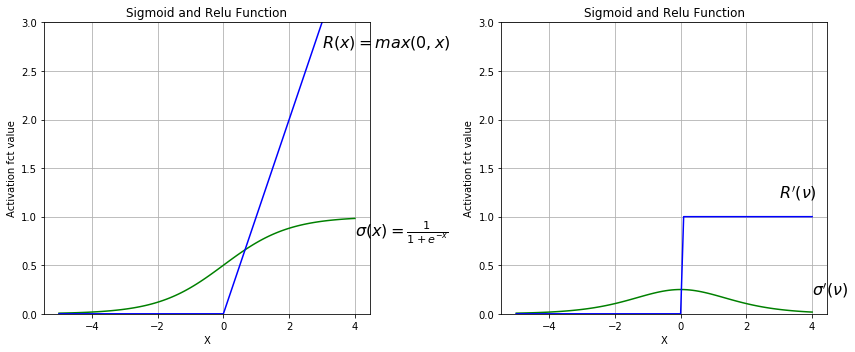

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

def relu_deriv(x):
    return (X > 0)*1


X = np.linspace(-5, 4, 100)
fig = plt.figure(figsize = (12,5))
ax1 = plt.subplot(1,2,1)
axes1 = plt.gca()
ax1.plot(X, sigmoid(X),'b', c= "g")
ax1.plot(X, relu(X),'b')
ax1.set_xlabel(r'$\nu$')
axes1.set_ylim([0,3])
ax1.set_ylabel('Activation fct value')
ax1.set_title('Sigmoid and Relu Function')
ax1.grid()
ax1.text(4, 0.8, r'$\sigma(nu)=\frac{1}{1+e^{-nu}}$', fontsize=16)
ax1.text(3, 2.75, r'$R(nu)=max(0,nu)$', fontsize=16)

ax2 = plt.subplot(1,2,2)
axes2 = plt.gca()
ax2.plot(X, sigmoid_deriv(X),'b', c= "g")
ax2.plot(X, relu_deriv(X),'b')
ax2.set_xlabel(r'$\nu$')
axes2.set_ylim([0,3])
ax2.set_ylabel('Derivative activation fct value')
ax2.set_title('Sigmoid and Relu Function')
ax2.grid()
ax2.text(4, 0.2, r'$\sigma^\prime(\nu)$', fontsize=16)
ax2.text(3, 1.2, r'$R^\prime(\nu)$', fontsize=16)

fig.tight_layout()
plt.savefig('activationfct value.png')

plt.show()

## 4. Data Science Challenge.

Joint Group Work by

1029141

1028910

1032494

In [ ]:
# Importing relevant packages
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [ ]:
# load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# Reshape the data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [5]:
# Reshape the data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [ ]:
# normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255
# normalize inputs from 0-255 to 0-1

X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


# number of classes
num_classes = y_test.shape[1]

In [9]:
# create model
model = Sequential()
    
model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
    
model.add(Flatten())
model.add(Dense(200, activation='relu'))
    
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

# Save model
model.model.save('model_convolution2.h5')

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 222s - loss: 0.2276 - acc: 0.9349 - val_loss: 0.0786 - val_acc: 0.9759
Epoch 2/10
60000/60000 [==============================] - 220s - loss: 0.0701 - acc: 0.9796 - val_loss: 0.0469 - val_acc: 0.9848
Epoch 3/10
60000/60000 [==============================] - 220s - loss: 0.0505 - acc: 0.9843 - val_loss: 0.0379 - val_acc: 0.9875
Epoch 4/10
60000/60000 [==============================] - 215s - loss: 0.0384 - acc: 0.9880 - val_loss: 0.0376 - val_acc: 0.9875
Epoch 5/10
60000/60000 [==============================] - 215s - loss: 0.0302 - acc: 0.9909 - val_loss: 0.0344 - val_acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 217s - loss: 0.0259 - acc: 0.9917 - val_loss: 0.0332 - val_acc: 0.9886
Epoch 7/10
60000/60000 [==============================] - 222s - loss: 0.0203 - acc: 0.9934 - val_loss: 0.0359 - val_acc: 0.9880
Epoch 8/10
60000/60000 [=======================

In [10]:
# Get accuracy or other parameters from saved model
from keras.models import load_model

model = load_model('model_convolution2.h5')

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.06%
